<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Flexible Biopolymer – The Fiber Bundle Bridge Model

### Examples – Biophysics
<section class="post-meta">
By Jonas Tjemsland, Andreas S. Krogen and Jon Andreas Støvneng.
</section>
Last edited: January 31st 2019
___
This notebook is based on an assignment given in the course TMA4320 *Introduction to Scientific Computation* at NTNU in 2017. The assignment was prepared by Alex Hansen, Jon Andreas Støvneng
Jonas Blomberg Ghini and Rita Dias. The codes are based on a set of python scripts (see the references) originally developed by Håkon Tormodsen Nygård, later modified by Jonas Blomberg Ghini.
___

## Introduction

Imagine a polymer which is stuck to a surface. This is of course due to molecular forces. Assume that the polymer components contain electrical charges or dipole moment. Then, using a sufficiently strong electric field we can pull the polymer away from the surface. Water molecules also have dipole moment and one can bend a jet of water from the tap with a comb charged with static electricity. This is the same effect. The goal is to model this disentanglement. If the polymer is bounded to a surface, it means that in regular (or irregular) intervals along the polymer there are *functional groups* that can form more or less strong bonds to atoms in the surface. This bond can be described by a potential function $E(R)$, which typically looks something like the potential shown in figure 1 (you can read more about it in our notebook on [Lennard-Jones Potential](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/lennard_jones_potential.ipynb)). Around equilibrium, the potential is approximately harmonic, $E(R)=E_0 + \frac{1}{2} k(R-R_0)^2$, and one can estimate the force necessary to break the current bond between the surface and polymer. 

<img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Argon_dimer_potential.png" width="400">

**Figure 1.** Typical potential describing a chemical bond. Near the minimum, the potential is approximately harmonic.

The problem explained above is completely analogous to a macroscopic cable which is attached to the ceiling with hooks, where the hooks are considered as ideal springs. The cable represents the polymer, the gravitational pull represents the electric field and the springs represents the bonds attaching the polymer to the surface. The cable model provides a classical, macroscopic picture of the problem, which is easier to have intuition about. A gradually increasing electric field, can for example be analogous to a cable with increasing weight due to rusting.

## Dangling cable

We will describe a variant of the *Fiber Bundle Model* (see e.g. Ref. [[1]](#rsc) for a general intoduction) called *The Fiber Bundle Bridge Model*, first studied by Nygård [[2]](#rsc). Imagine a cable hanging parallel to the ceiling by a set of equally distanced hooks (Fig. 2).

<img src="https://www.numfys.net/media/notebooks/images/cable_model.png" width="400">
**Figure 2.** Cable hanging by the ceiling by equally distanced hooks.

Assume that the ends of the cable are welded together, creating a a ring (periodic boundary conditions). Moreover, assume that this ring is "large" (what we mean by large will become apparent later).

### The cable

We now proceed to describe the cable itself. We introduce a coordinate system with an $x$-direction along the cable and a vertical $y$-axis with $y=0$ at the ceiling (Fig. 2). The cabel may then be described by a function $y(x)$. Assume that the cable has a uniform mass distribution, with mass $\lambda$ per unit length. The force on the cable due to the gravitational pull is then

$$f_g=-\lambda g,$$

per unit length. We assume that the cable has a rigidity such that it generates internal forces that oppose bending (both normal stress and shear stress). As long as the bendings are small, the net force per unit length due to stress is given by 

$$f_b=-B\frac{\text d^4y}{\text dx^4}$$

(see e.g. Ref. [[3]](#rsc)). Here, $B=EI$ is the bending stiffness, given by the product of the elastic modulus (or Young's modulus) $E$ and the area moment of inertia (or second moment of area) $I$. In the case of a cable with circular cross section we have $I=\pi r^4/4$.

For steel we have $E\simeq 200 \text{ GPa}$ (Structural ASTM-A36 in Ref [[4]](#rsc)). DNA has a Young’s modulus of the order of $0.3–1\;\text{GPa}$ (we will be using $0.3\;\text{GPa}$), similar to hard plastic [[5]](#rsc).

As mentioned earlier, we will be welding the ends of the cable together, creating a circle. This circle is assumed to be large enough for this bending force to be neglected.

### The hooks
We have now come to the description of the hooks. They are located along the ring spaced a distance $L$ apart (measured along the ring). There are a total of $N$ hooks, numbered by $k=0, 1, ... N-1$. The origin $x=0$ is placed such that the position of the $k$'th hook is $x_k=Lk$. As mentioned above, we are considering periodic boundary conditions (due to the ring). Thus, hook $k$ is adjacent to the hooks $k-1$ and $k+1$ for $k = 1,2,..., N-2$. Hook $0$ is adjacent to $1$ and $N-1$, and hook $N-1$ to $N-2$ and $0$.

Each of the hooks is approximated by an ideal spring with a spring constant $\kappa_k$. In other words, the potential is harmonic and the springs follow Hook's law.

The hook will snap as the force is increased. The spring constant can therefore have two different values: $\kappa_k=\kappa>0$ for an intact spring and $\kappa_k=0$ for a snapped spring. We will return to this later.

The force on the cable per unit length from the $k$'th hook is

$$f_k=-\kappa_k(y(x)-y_0)\delta(x-Lk),$$

where $|y_0|$ is the length of the unstreched springs. Remember that both $y(x) < 0$ and $y_0<0$ in our coordinate system. The force from hook $k$ is thus pointed *upwards* ($+y$-direction). The function $\delta(x-Lk)$ is the *Dirac delta function*.

### The cable equation
We will be considering a cable at rest. By Newton's first law, the sum of the forces on the cable must be zero:

$$f_b+f_g+f_k = 0.$$

By combining all the equations above, we obtain

\begin{equation}
B\frac{\text d^4y(x)}{\text dx^4} = -g\lambda - \sum_{k=0}^{N-1}\kappa_k(y(x)-y_0)\delta(x-lk). 
\label{one}
\end{equation}

This is the *cable equation* and describes the form of the cable $y(x)$. 

## Solving the cable equation
Introduce the dimensionless variables $\xi \equiv x/L$ and $\eta \equiv y/L$ and the dimensionless parameters $\alpha\equiv g\lambda L^3/B$ and $\beta_k\equiv \kappa_kL^3/B$. If we now shift the origin of the $y$-axis to $y_0$ we can write $\eqref{one}$ as

\begin{equation}
\frac{\text d^4\eta(\xi)}{\text d\xi^4} = -\alpha - \sum_{k=0}^{N-1}\beta_k\eta(\xi)\delta(\xi-k). 
\label{two}
\end{equation}

On the interval $k<\xi<k+1$ equation $\eqref{two}$ is reduced to

\begin{equation}
\frac{\text d^4\eta(\xi)}{\text d\xi^4} = -\alpha.
\label{three}
\end{equation}

This equation is easy to solve. It has the solution

\begin{equation}
\eta_k(\xi)=-\frac{\alpha}{24}(\xi-k)^4 + a_k(\xi - k)^3 + b_k(\xi-k)^2 + c_k(\xi-k)+d_k,
\label{four}
\end{equation}

where $\eta_k(\xi)$ is the solution of $\eqref{three}$ - and thus $\eqref{two}$ - on the interval $k<\xi<k+1$. The coefficients $a_k, b_k, c_k, d_k$ are integration constants yet to be decided.

Let us now consider $\xi=k$. To the "right" of $\xi=k$ we have the solution $\eta_k(\xi)$ and to the "left" we have the solution $\eta_{k-1}(\xi)$. By integrating $(2)$ on the interval $\xi\in[k-\epsilon, k+\epsilon]$ for some small $\epsilon$, we get

$$\frac{\text d^3 \eta_k (k+\epsilon)}{\text d\xi^3} - \frac{\text d^3 \eta_{k-1} (k-\epsilon)}{\text d\xi^3}=-2\epsilon \alpha-\beta_k\eta_k(k).$$

If we let $\epsilon\to 0$, this reduces to

\begin{equation}
\frac{\text d^3 \eta_k (k)}{\text d\xi^3} - \frac{\text d^3 \eta_{k-1} (k)}{\text d\xi^3}=-\beta_k\eta_k(k).
\label{five}
\end{equation}

By inserting the solution $\eqref{four}$ we obtain the first boundary condition.

Equation $\eqref{five}$ says that the third derivative of $\eta$ has a finite step at $\xi=k$. In turn, this implies that the second and first derivative of $\eta$, as well as $\eta$ itself, are continuous at $\xi=k$. This yields three additional boundary conditions:

\begin{align}
\frac{\text d^2 \eta_k (k)}{\text d\xi^2} - \frac{\text d^2 \eta_{k-1} (k)}{\text d\xi^2}&=0 \\
\frac{\text d \eta_k (k)}{\text d\xi} - \frac{\text d \eta_{k-1} (k)}{\text d\xi}&=0 \\
\eta_k(k)-\eta_{k-1}(k)&=0.
\label{six}
\end{align}

By using the four boundary conditions $\eqref{five}$-$\eqref{six}$ with the solution $\eqref{four}$ one gets four equations that couple the constants $a_k, b_k, c_k, d_k$ by $a_{k-1}, b_{k-1}, c_{k-1}, d_{k-1}$. We obtain one set of equations for each $k=0, 1, ..., N-1$.

As always, we start by importing packages, setting common figure parameters and defining physical parameters.

In [30]:
import matplotlib.pyplot as plt
from scipy.linalg.lapack import ssbevd
import numpy as np
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from scipy.sparse.linalg import spsolve
from scipy import sparse
import matplotlib.gridspec as gridspec
import progressbar
import time

newparams = {'axes.labelsize': 25, 'axes.linewidth': 1, 'savefig.dpi': 200,
             'lines.linewidth': 3, 'figure.figsize': (20, 10),
             'ytick.labelsize': 25, 'xtick.labelsize': 25,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'figure.titlesize': 25, 
             'legend.fontsize': 25, 'legend.frameon': True, 
             'legend.handlelength': 1.5, 'axes.titlesize': 30,
             'axes.titlepad' : 20,
             'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

hbar = 1.05e-34  # J⋅s.   Reduced Plank's constant
m = 9.11e-31     # kg.    Electron mass
e = 1.6e-19      # C.     Elementary cahrge
g = 9.81         # m/s².  Gravitational acceleration

global N, lengthBetweenFibers, unitOfSeparation, alpha, beta_base, beta, thresholdExtensions
global A, u, x

### Some parameters

We will we considering a steel cable with mass density $\rho_\text{steel}=8030\text{ kg/m}^3$, as well as a DNA-molecule. To quickly change between these we create some functions that return the relevant parameters.

For the DNA molecule we will make the following assumptions: The molecule is bounded to a surface (e.g. gold) with a binding for each 5th nanometer (nm). Each binding can be approximated as an ideal spring with equilibrium length of 0.5 nm and spring constant of 0.1 N/m. The molecule has a approximate circular cross section of radius 1 nm. The molecule is typically negatively charged (in its *'natural enviroment'*), with approximately two elementary charges on per 0.34 nm. Assume that this charge is uniformly distributed along the molecule. Moreover, assume that a given binding between the molecule and the surface can withstand approximately a 0.1 nm strech before is breaks.

In [31]:
def get_DNA_params(N):
    
    electricFieldStrength = 5.0e4  # V/m
    
    # Radius of the hanging cable
    r_DNA = 1e-9  # m
    # Distance between hooks/fibers
    l_DNA = 5e-9  # m
    # Young's modulus
    E_DNA = 300e6 # Pa
    # Charge per length
    charge_lambda = 2 * e / 0.34e-9    # C/m
    # Cable stiffness
    B = E_DNA * np.pi / 4 * r_DNA ** 4 # N⋅m²
    
    alpha = electricFieldStrength * charge_lambda * l_DNA ** 3 / B
    # Conversion factor between alpha and real load, here: electric field (2.0e6 N/C (V/m)
    # for reference values)
    alphaToLoadConversionFactor = B / charge_lambda / l_DNA ** 3
    
    # Spring constant of the dipole bindings
    kappa = 0.1 # N/m
    beta_base = kappa * l_DNA ** 3 / B
    # Make it a vector, so that updating the value is possible as fibers/bindings are broken
    beta = np.ones(N) * beta_base
    
    # Allowable extension in m
    thresholdExtension_base = 0.1e-9  # m
    # Conversion for direct comparison with eta(xi_minus_k)
    thresholdExtension_normalized = thresholdExtension_base / l_DNA
    # Select N random fiber threshold extensions
    thresholdExtensions = np.random.uniform(0, thresholdExtension_normalized, N)
    
    # Make tuple of load type, its unit, its relation to SI, the model's lambda parameter
    # and ITS unit
    loadType_and_units = ('Electric field strength', 'MV/m', 1e6, charge_lambda, 'C/m')
    
    return (loadType_and_units, alphaToLoadConversionFactor, beta_base,
            thresholdExtension_normalized)


def get_steel_params(N):

    # Radius of the hanging cable
    r_cable = 0.01 # m
    # Distance between hooks/fibers
    l_cable = 1    # m
    # (3.14e-4 m^2 for reference values)
    crossSection_cable = np.pi * r_cable ** 2 # m²
    # Mass density of steel
    RHO_STEEL = 8030 # kg/m³
    # Mass per length
    mass_lambda = RHO_STEEL * crossSection_cable # kg/m
    # Radius of the wire holding up the large cable
    r_wire = 0.0005 # m
    # Length of fibers/wires, m
    l_wire = 0.5    # m
    # (7.854e-7 m^2 for reference values)
    crossSection_wire = np.pi * r_wire ** 2
    
    # Young's modulus
    E_cable = 200e9 # Pa
    # Young's modulus
    E_wire = 200e9  # Pa
    
    # Cable stiffness
    B = E_cable * np.pi / 4 * r_cable ** 4      # N⋅m²
    # Spring constant of the fibers/steel wires
    kappa = E_wire * crossSection_wire / l_wire # N/m    
    
    alpha = g * mass_lambda * l_cable ** 3 / B
    # Conversion factor between alpha and real load, here: electric field (160.0 kg/m for
    # reference values)
    alphaToLoadConversionFactor = B / g / l_cable ** 3
    
    # 200 for reference values
    beta_base = kappa * l_cable ** 3 / B
    # Expressed as a vector to allow for different effectively different spring constants,
    # if ever needed
    beta = beta_base * np.ones(N)
    
    # For steel, from Wikipedia, 250 - 2500 MPa
    yieldStrength = 800e6
    # Dividing by the cable span makes the extension directly comparable to eta
    thresholdExtension_normalized = (yieldStrength * crossSection_wire / kappa) / l_cable
    # Randomly select a threshold extension for each fiber
    thresholdExtensions = np.random.uniform(0, thresholdExtension_normalized, N)
    
    # Make tuple of load type, its unit, its relation to SI, the model's lambda parameter and
    # ITS unit
    loadType_and_units = ('Mass density', 'kg/m', 1, mass_lambda, 'kg/m')
    
    return (loadType_and_units, alphaToLoadConversionFactor, beta_base,
            thresholdExtension_normalized)


def get_artificial_params(N):
    alpha = 1
    alphaToLoadConversionFactor = 1
    
    beta_base = 1
    # Expressed as a vector to allow for different effectively different spring
    # constants, if ever needed
    beta = beta_base * np.ones(N)
    
    thresholdExtension_normalized = 1
    # Randomly select a threshold extension for each fiber
    thresholdExtensions = np.random.uniform(0, thresholdExtension_normalized, N)

    # Make tuple of load type, its unit, its relation to SI, the model's lambda parameter and
    # ITS unit
    loadType_and_units = ('Arbitrary system load', '[a.u.]', 1, 1, '[a.u.]')
    
    return (loadType_and_units, alphaToLoadConversionFactor, beta_base,
            thresholdExtension_normalized)

### Matrix equation

By defining a vector

$$\vec x = [a_0, b_0, c_0, d_0, ... a_k, b_k, c_k, d_k, ... a_{N-1}, b_{N-1}, c_{N-1}, d_{N-1}]^T,$$

the set of equations (obtained by the four boundary conditions $\eqref{five}$-$\eqref{six}$ with the solution $\eqref{four}$) can be formulated as the matrix equation

$$A\vec x = \vec u.$$

We thus need functions for creating the right hand side $\vec u$ and the matrix $A$ for a given $N$.

In [32]:
def make_rhs_vec(N):
    """
    Make the right hand side of the system, called u in the matrix equation
    :param N: System size
    :return u: the rhs of the matrix equation to be solved
    """
    u = np.zeros(4 * N, dtype=np.float64)
    u[0::4] = -1.
    u[1::4] = -1 / 2.0  
    u[2::4] = -1 / 6.0
    u[3::4] = -1 / 24.0
    return u

We will be using a sparse solver for solving the matrix system. There are several benefits of using a sparse matrix representation;  we do not store a large amount of irrelevant zeros and the computation time is reduced by eliminating operations on zero elements. There are several ways to treat sparse matrices in Python. Take a look at [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html)! The following function creates a [Dictionary Of Keys based sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dok_matrix.html) of the matrix $A$.

In [33]:
def make_dok_matrix(N, beta=1.0):
    """
    With a given system size and fiber strength, create a sparse matrix to be used with
    a sparse solver.
    :param N: Number of fibers
    :param beta: Normalized spring constant of intact fibers
    :return A_sparseDok: The sparse Dictionary of Keys matrix A_sparseDok
    """
    # By using the dok_matrix, assigning elements is exactly like for a dense matrix
    A_sparseDok = sparse.dok_matrix((4 * N, 4 * N))
    # Index to keep track of the elements called "k"
    ind = 0
    # Index to keep track of the elements called "k-1"
    ind_minus = 4 * (N - 1)

    for i in np.arange(N):
        # Eq. 1
        A_sparseDok[ind + 0, ind + 0] = 6.0
        A_sparseDok[ind + 0, ind + 3] = beta
        A_sparseDok[ind + 0, ind_minus + 0] = -6.0
        # Eq. 2
        A_sparseDok[ind + 1, ind + 1] = 2.0
        A_sparseDok[ind + 1, ind_minus + 0] = -6.0
        A_sparseDok[ind + 1, ind_minus + 1] = -2.0
        # Eq. 3
        A_sparseDok[ind + 2, ind + 2] = 1.0
        A_sparseDok[ind + 2, ind_minus + 0] = -3.0
        A_sparseDok[ind + 2, ind_minus + 1] = -2.0
        A_sparseDok[ind + 2, ind_minus + 2] = -1.0
        # Eq. 4
        A_sparseDok[ind + 3, ind + 3] = 1.0
        A_sparseDok[ind + 3, ind_minus + 0] = -1.0
        A_sparseDok[ind + 3, ind_minus + 1] = -1.0
        A_sparseDok[ind + 3, ind_minus + 2] = -1.0
        A_sparseDok[ind + 3, ind_minus + 3] = -1.0

        # Advance the indices for the next iteration
        ind = 4 * (i + 1)
        ind_minus = 4 * i

    return A_sparseDok

### Simple analytical example
It is simple to find the solution for the set of equations when all the hooks are identical, such that $\beta_k=\beta$. Due to symmetry, we have $a_k=a, b_k=b, c_k=c, d_k=d$, and the equations $\eqref{five}$ and $\eqref{six}$ have the solution $a=\alpha/12$, $b=-\alpha/24$, $c=0$, $d=-\alpha/\beta$. Let us try to solve $A\vec x=\vec u$ numerically to see if we obtain the same solution and plot the resulting $\eta(\xi)$ to check if it seems reasonable. Let us use $N=5$ and $\alpha=\beta=1$.

a = 0.083 = 1/12.000
b = -0.042 = 1/-24.000
c = 0.000
d = -1.000


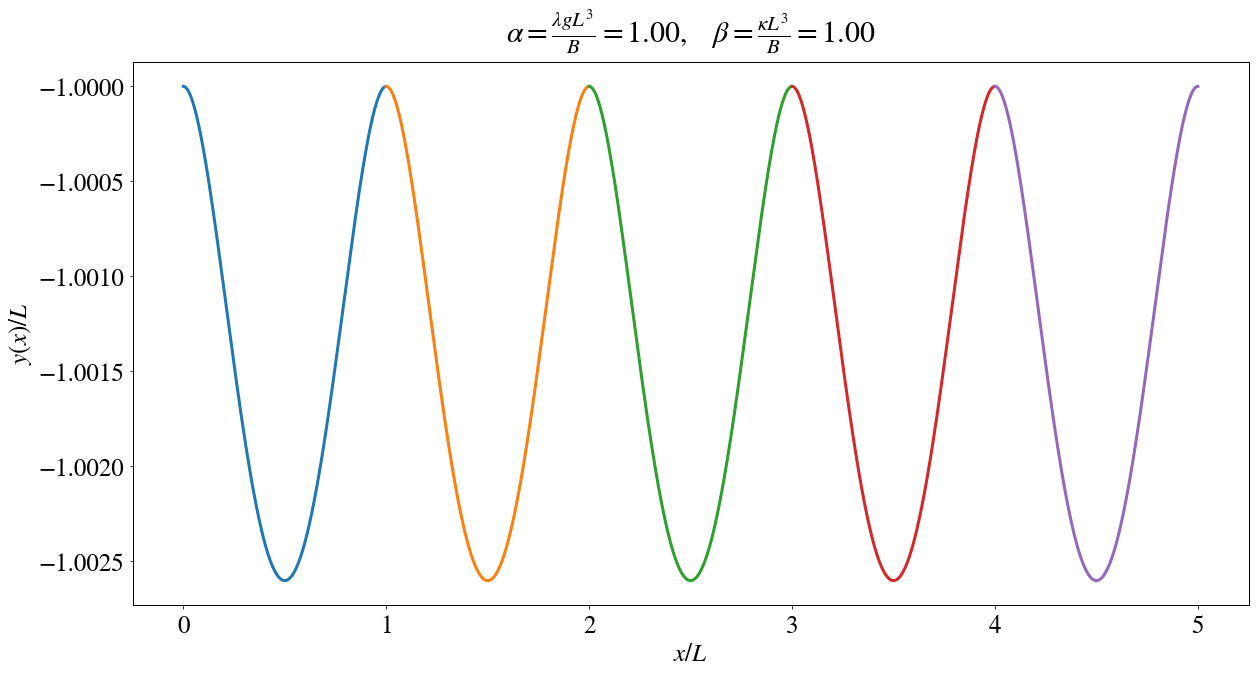

In [34]:
N = 5
loadType_and_units, alpha, beta_base, thresholdExtension_normalized = get_artificial_params(N)
A_sparseDok = make_dok_matrix(N, beta_base)
u = make_rhs_vec(N)*alpha
# Solve the system with the sparse solver of SciPy
x = spsolve(A_sparseDok.tocsc(), u)
# Print the solution for a, b, c and d
print("a = %.3f = 1/%.3f"%(x[0], 1/x[0]))
print("b = %.3f = 1/%.3f"%(x[1], 1/x[1]))
print("c = %.3f"%(x[2]))
print("d = %.3f"%(x[3]))
# Plot results
xi = np.linspace(0.0, 1.0, 200)
for k in range(N):
    # Solution polynomial, eq. (11)
    eta = -(alpha/24)*xi**4 + x[4*k + 0]*xi**3 + x[4*k + 1]*xi**2 + x[4*k + 2]*xi + x[4*k + 3]
    # Plot the cable location
    plt.plot(xi + k, eta)
title = (r"$\alpha = \frac{\lambda g L^3}{B} = %.2f,\quad \beta = \frac{\kappa L^3}{B} = %.2f$"
         %(alpha, beta_base))
plt.title(title)
plt.xlabel(r"$x/L$")
plt.ylabel(r"$y(x)/L$")
plt.show()

**A small exercise:** Plot $\text d\eta /\text d\xi$, $\text d^2\eta /\text d\xi^2$ and $\text d^3\eta /\text d\xi^3$ and check that the boundary conditions are fulfilled.

## Disentanglement

Let each hook (or chemical bond) have a given maximum pull it can withstand before it breaks. That is, we make the following assumption:

$$\beta_k = \begin{cases}
\beta & \mbox{if $|\eta(k)| < t_k$,}\\
0 & \mbox{if $|\eta(k)| \geq t_k$,}
\end{cases}$$

where $t_k$ is the breaking threshold for hook $k$. For simplicity, we will let each $t_k$ be a random number between 0 and a given maximum value $t_\text{max}$. This will give a uniform threshold distribution, but we could of course choose some other distribution (maybe a normal distribution would be the best choice?).

Imagine that the value of $\alpha$ is gradually increasing. Physically, this could be described by a cable with increasing weight due to rusting (or increasing electrical field in the case of the polymer). A more dramatic situation would correspond to a deluge system
with hollow tubes whose weight increases as they are filled with water during the fire alarm! Nevertheless, with an increasingly heavier cable the hooks will begin to break. As soon as hook $k$ has broken, $\beta_k$ becomes zero. This changes our $A$ matrix, and we need to solve the matrix system again to find the correct $\vec x$, and thus $\eta(\xi)$. The following function will update our (sparse) $A$ matrix when a given hook is broken.

In [35]:
def break_fiber_in_sparse_dok(A_sparseDok, indexOfBrokenFiber):
    """
    Break a fiber in the system by setting the corresponding matrix element to zero.

    :param A_sparseDok: Sparse Dictionary of Keys matrix
    :param indexOfBrokenFiber: What fiber to break next (type: INT)
    :return A_sparseDok: Same matrix as input, but with one more fiber broken
    """
    indexInMatrix = 4 * indexOfBrokenFiber
    A_sparseDok[indexInMatrix + 0, indexInMatrix + 3] = 0.0
    return A_sparseDok

**A small exercise:** Break one or more of the hooks in the setup of the previous section and plot the corresponding $\eta(\xi)$.

The simplest way to perform the scheme mentioned above is to increase $\alpha$ step by step and see what happens to the cable and the hooks for each step. However, there is a smarter method: One can exploit the fact that the system is linear.

The right hand side of our matrix equation, $A\vec x = \vec u,$ can be written as $\alpha \vec u_\text{ref},$ where $\vec u_\text{ref}$ is some *'reference load'* with $\alpha=1$ with corresponding solution $\vec x_\text{ref}$. This implies that $\vec x = \alpha \vec x_\text{ref}$. Assume that the next hook that breaks is $j$. This means that we evaluate the solution $\eqref{four}$ in the hook's position $\xi=j$ just before the hook breaks. From $\eqref{four}$ it is clear that $\eta_j(j) = d_j$. Moreover, this means that $d_j$ at this moment (just before the hook breaks) is equal to the negative threshold $-t_j$. The linearity in $\alpha$ described above implies that $d_j = \alpha d_\text{ref j}$, such that

$$\frac 1\alpha = -\frac{d_\text{ref j}}{t_j}.$$

Introduce the ratio 

$$r_k = \left(-\frac{\beta_k\eta(k)}{t_k}\right)_{\alpha=1}$$

for all hooks $k\in[0, N-1]$. Note that $r_k$ is essentially the ratio between the stretch and the threshold stretch. Thus, the hook that will break next is the hook with the largest $r_k$-value! $\beta_k$ is included in $r_k$ to ensure that we do not pick a hook that is already broken (remember that $\beta_k=0$ for a broken hook).

When we have identified which hook $j$ is going to break next, we can calculate the corresponding $\alpha$-value. By combining the two preceding equations we obtain

$$\alpha = \frac{\beta}{r_j}.$$

Let's summarize: We start with all the hooks intact. We find $k$ for the hook which breaks first and the corresponding $\alpha$-value. Call this $\alpha$ for $\alpha_1$. Now, set $\beta_k$ to zero and solve the matrix equation again. Repeat this to find the entire sequence $\alpha_n$, $1\leq n\leq N$.

This algorithm is implemented in the function below. 

In [36]:
def run_simulation(N, beta, thresholdExtension_base):
    """
    This function is the bread and butter of the project, in that it incorporates the
    strain-curve algorithm, and returns the order and weights (alpha's) related to each
    breaking of a fiber.

    :param N: System size
    :param beta: Normalized spring constant (single value, not vector)
    :param thresholdExtension_base: Baseline number for the thresholds, to be used in
                                    a random selection
    :param simID: Name of the simulation, needed only to keep track of progress

    :return breaking_order: Vector with the order in which the fibers broke in this
                            particular simulation
    :return breaking_alpha: Vector with the alpha's needed to break each successive fiber
    """
    
    thresholds = np.random.uniform(0, thresholdExtension_base, N)

    # Initialize the system, assuming all fibers are intact
    A_sparseDok = make_dok_matrix(N, beta)
    u = make_rhs_vec(N)

    # beta_values = beta for elements which are broken and zero otherwise
    beta_values = np.zeros(N) + beta

    # Initialize the two return values of the function
    breaking_order = np.zeros(N)  # Stores the order in which the fibers break
    breaking_alpha = np.zeros(N)  # Stores the alpha necessary to break the particular fiber

    # The weakest fiber is always the first to break
    # Get the "name" of the weakest fiber
    indexOfFiberToBreak = np.argmin(thresholds)
    # Set the corresponding beta value to zero
    beta_values[indexOfFiberToBreak] = 0.0
    # Break the corresponding value in the matrix
    A_sparseDok = break_fiber_in_sparse_dok(A_sparseDok, indexOfFiberToBreak)
    # Again, the weakest fiber always breaks first
    breaking_order[0] = indexOfFiberToBreak
    breaking_alpha[0] = beta * thresholds[indexOfFiberToBreak]

    for i in np.arange(N - 1):
        # Solve the system with the sparse solver of SciPy
        x = spsolve(A_sparseDok.tocsc(), u)

        # Check which fiber to break next
        allExtensions = -x[3::4]
        # Calculate the ratios
        ratioExtensionToThreshold = beta_values * (allExtensions / thresholds)
        # Find the largest extension (a large extension means a large ratio of this
        # extension compared with the threshold)
        indexOfFiberToBreak = np.argmax(ratioExtensionToThreshold)
        # Set that fiber's beta to zero
        beta_values[indexOfFiberToBreak] = 0.0
        # Update the order of breaks
        breaking_order[i + 1] = indexOfFiberToBreak
        # Calculate the alpha necessary for this fiber to break
        breaking_alpha[i + 1] = beta / ratioExtensionToThreshold[indexOfFiberToBreak]
        # Update the sparse matrix, in preparation for the next iteration
        A_sparseDok = break_fiber_in_sparse_dok(A_sparseDok, indexOfFiberToBreak)

    return breaking_order, breaking_alpha

### Running the simulations

All that is left is to run the simulations above many times, average the results and plot the results. Let's create a main function to do this! The plots made are described in more detail below.

In [37]:
def main(what_to_do, numberOfSimsToRun, N):
    
    # Selection structure for the various model parameters, corresponding to different
    # kinds of cables
    if what_to_do == 'DNA':
        params = get_DNA_params(N)
    elif what_to_do == 'steel':
        params = get_steel_params(N)
    elif what_to_do == 'artificial':
        params = get_artificial_params(N)
    else:
        raise ValueError('Supported simulation types: DNA, steel, artificial')

    loadType_and_units, alphaToLoadConversionFactor, beta, thresholdExtension = params
    
    # Unpack the "loadType_and_units" tuple and assign elements to variables
    (loadName, loadName_unit, loadName_unit_order, modelLambda, 
                                     modelLambda_unit) = loadType_and_units

    bar = progressbar.ProgressBar()
    breakingOrder = []
    alphaForEachFiberBreaking = []
    # Run sims
    for simID in bar(range(numberOfSimsToRun)):
        # Store the new values in temporary vectors
        breakingOrder_new, alphaForEachFiberBreaking_new = run_simulation(N, beta,
                                                                          thresholdExtension)
        # Append the new breakingOrder vector to the old one, growing the old one
        breakingOrder = np.append(breakingOrder, breakingOrder_new)
        # Same here
        alphaForEachFiberBreaking = np.append(alphaForEachFiberBreaking,
                                              alphaForEachFiberBreaking_new)

    # Once all the simulations are done, we have to reshape the results, to a matrix,
    # rather than long appended lists, so that we can manipulate them more easily
    breakingOrder = breakingOrder.reshape((numberOfSimsToRun, N))
    # Same here
    alphaForEachFiberBreaking = alphaForEachFiberBreaking.reshape((numberOfSimsToRun, N))
    # Sum over all alpha's in preparation of getting the average, resulting in a list
    alphaForEachFiberBreaking_total = np.sum(alphaForEachFiberBreaking, axis=0)
    # Divide by the number of sims to get the avg
    alphaForEachFiberBreaking_avg = [alpha_element / numberOfSimsToRun 
                                     for alpha_element in alphaForEachFiberBreaking_total]  

    # Plot the strain curve
    k_N = np.linspace(0.0, 100, N)  # x-vector for plotting
    title = r'Strain curve, $\beta$ = %.2f, $\lambda_{{model}}$ = %.2f %s'%(beta,
                                                            modelLambda, modelLambda_unit)
    xlabel = '%% of broken fibers, of total %.0f'%(N)
    alpha_over_beta = [alpha_break / beta for alpha_break in alphaForEachFiberBreaking_avg]
    plt.figure('Strain Curve')
    plt.title(title)
    plt.plot(k_N, alpha_over_beta, 'k')
    plt.xlabel(xlabel)
    plt.ylabel('$\\alpha$/$\\beta$')
    plt.ylim(0, np.max(alphaForEachFiberBreaking_avg)*1.1/beta)
    ax2 = plt.twinx()
    ax2.set_ylim(0, np.max(alphaForEachFiberBreaking_avg)*1.1* alphaToLoadConversionFactor
                                        / loadName_unit_order)
    ax2.set_ylabel('%s %s'%(loadName, loadName_unit))


    # Plot the breaking order
    plt.figure('Breaking order')
    # This acts as the x axis label, because matshow puts its x labels on top of the figure
    plt.xlabel('Number of fibers broken')
    plt.ylabel('Simulation number')
    # Plot the individual elements of the breakingOrder matrix, and store a handle to the plot
    pictureOfBreakingOrder = plt.imshow(breakingOrder, extent=[0, N, 0, numberOfSimsToRun],
                                        aspect='auto')
    # Create a colorbar for the plot, based on the handle from before
    colorbar = plt.colorbar(pictureOfBreakingOrder) 
    # Set a label to the colorbar
    colorbar.set_label('Breaking of fiber number')

    plt.show()

We will be simulating 100 hooks 1000 times for the steel cable. Try with the DNA and other parameters for yourselves!

In [40]:
numberOfSimsToRun = 1000
numberOfFibers = 100

100% (1000 of 1000) |####################| Elapsed Time: 0:02:33 Time:  0:02:33


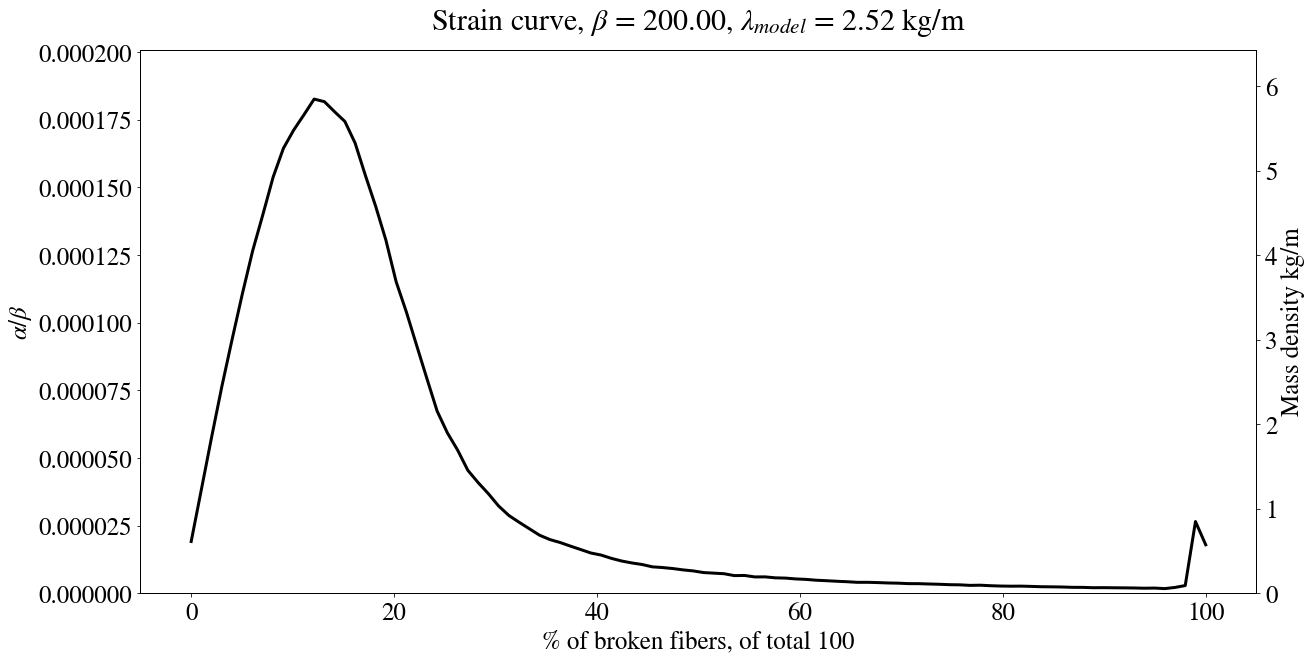

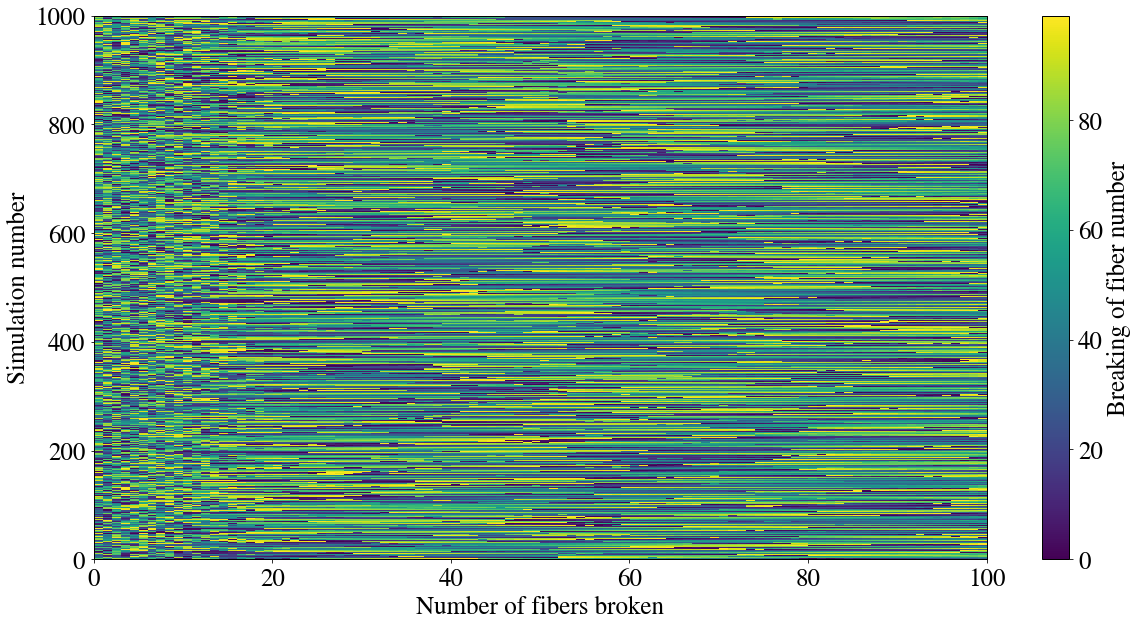

In [41]:
main('steel', numberOfSimsToRun, numberOfFibers)

In the first plot, the $\alpha$ (or equivalently, the mass density of the cable — or the electic field) needed to break the next hook is shown. In the second plot, one can see which hook number is being broken as a funciton of the number of fibers broken, for each of the simulations.

The results are as one could intuitively expect: In the beginning the breaking is quite random due to the fact that the thresholds are random. However, the force on the remaining hooks will increase both due to the increase in $\alpha$ and the decreasing number of hooks. Thus, after some time neighboring hooks will have larger probability to break. Moreover, at some point we will expect that the $\alpha$ needed to break the next hook is decreasing. That is, the maximum $\alpha$ corresponds to the $\alpha$-value needed to detach the cable from the roof!

___

## Exercises and further work
Test the codes for different $\alpha$ and $\beta$ values.
 - What happens to $\max \alpha_n$ — that is, the force to needed to detach the cable from the roof  — or equivalently, the electric field needed to disentangle the polymer — as a function of $\beta$?
 - How does the curve for the average $\alpha_n$ look for large and small values of $\beta$? Note that you might need a span of several orders of magnitudes in $\beta$, but remember that the model assumes a quite small bend of the cable.
 - Compare the typical number of hooks that have to break before the cable falls down, for a small and a large $\beta$.  How can the difference be explained?
 - Study the order at which the hooks break more closely. How does this change with $\beta$?
 
<a id="rsc"></a>
## Resources and further reading

The codes are based on a set of Python scripts originally developed by Håkon Tormodsen Nygård, later modified by Jonas Blomberg Ghini and are available at https://www.numfys.net/media/notebooks/files/FiberBundeModel_Code_170313.zip. The scripts also contain an interactive feature originally developed by Morten Vassvik. Check it out!

Project description in Norwegian, https://www.numfys.net/media/notebooks/files/TMA4320_Biofysikk_og_MedisinskTeknologi_Prosjekt.pdf.

<a>[1]</a> A. Hansen, P. C. Hemmer og S. Pradhan, The Fiber Bundle Model (Wiley-VCH, Berlin, 2015)  
<a>[2]</a> H. Nygård, The Fiber Bundle Bridge Model, Project Thesis, NTNU, 2016.  
<a>[3]</a> S. P. Timoshenko. History of Strength of Materials. With a Brief Account of the History
of Theory of Elasticity and Theory of Structures. Dover Publications, Inc., 1983.
Chap. V, p. 113. isbn: 0-486-61187-6.  
<a>[4]</a> The Engineering Toolbox: Modulus of Elasticity or Young's Modulus - and Tensile Modulus for common Materials  http://www.engineeringtoolbox.com/young-modulus-d_417.html [aquired 04.05.2017]  
<a>[5]</a> Bloom KS. Beyond the code: the mechanical properties of DNA as they relate to mitosis. Chromosoma. 2008;117(2):103-110. doi:10.1007/s00412-007-0138-0.